Domain –Travel Aggregator Analysis

Scenario:

Travelling has significantly changed thanks to technology. In the earlier days, it was not easy to travel as booking journeys used to be a hassle, where people needed to contact travel agents, get prices and then do a lot of paperwork.But, with the advent of online apps, it becomes easier to book tickets. However, one challenge is  still  there:  Due  to  many  available  apps  which  offer  bookings,  there  can  be  a  lot  of comparisons for getting the best price

Business Requirement:

A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top platforms (Yatra,  MMT,  Goibibo).  It  helps  the  user  compare  prices  for  their  upcoming  journeys  on  its platform and the customer is redirected to the desired platform after looking at the price. However, they need to do a lot of analysis of the data which they have collected over a while. As a  newly hired analyst and proficiency in python, your role is to help them perform an in-depth analysis

Objective: Please write an python script to provide answers for the following questions

1.Find the number of distinct bookings and sessions from the given datasets.

2.How many sessions have more than one booking

3.Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week

4.For each of the service names,display the total number of bookings and the total Gross Booking Value in INR

5.For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

6.Which are the top 3 departure cities from where customers book mostly in advance,provided that there have been at least 5 departures from that city?

7.Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

8.For each service, which is the most used device type for making bookings on the platform?

9.Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type

10.Consider the following example:

12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total. searches=100 bookings=10 customers=12The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following:

•What is the average oBSR for each month of the year?

•What is the average oBSR for each day of the week?

•Plot a time series of oBSR on all the given dates.

Data Description: Please provide answers to the following questions with Python script

1.Find the number of distinct bookings, and sessions from the given datasets.

2.How many sessions have more than one booking

3.Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week

4.For each of the service names, display the total number of bookings and the total Gross Booking Value in INR

5.For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

6.Which are the top 3 departure cities from where customers book mostly in advance, ifthere have been at least 5 departures from that city?

7.Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

8.For each service, which is the most used device type for making bookings on the platform?

9.Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type

Number of distinct bookings: 339
Number of distinct sessions: 331
Number of sessions with more than one booking: 237
Days of the week with highest number of bookings:
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: day_of_week, dtype: int64
    customer_id   booking_id   from_city from_country            to_city  \
0  customer_259   booking_82     Gurgaon        India          Ahmedabad   
1  customer_303  booking_156       Delhi        India           Brussels   
2  customer_203   booking_99  Devanhalli        India  Frankfurt am Main   
3  customer_211  booking_319     Gurgaon        India  Frankfurt am Main   
4  customer_287  booking_222     Gurgaon        India   Roissy-en-France   

  to_country booking_date      booking_time device_type_used  \
0      India   2020-02-05  05-02-2020 16:12          Desktop   
1    Belgium   2018-11-21  21-11-2018 08:21          Android   
2    Germany   2019-12-16  16-12-2019 22

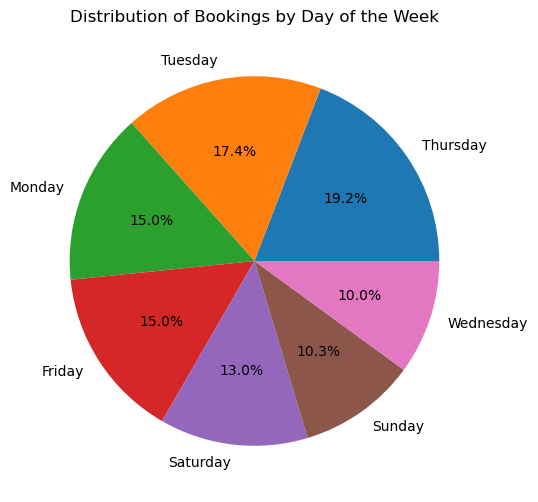

Most booked route for customers with more than 1 booking: ('Gurgaon', 'Roissy-en-France')
Top 3 departure cities with most advance bookings
top_3_advance_departure_cities


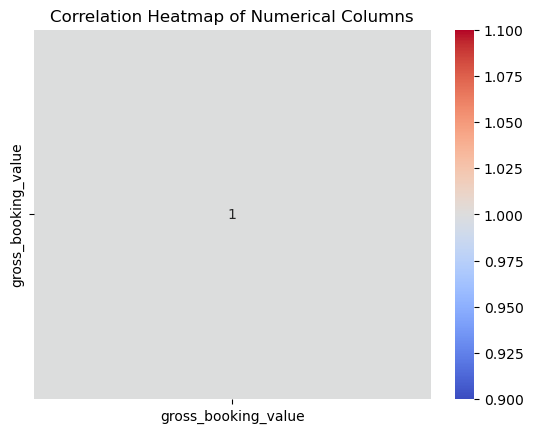

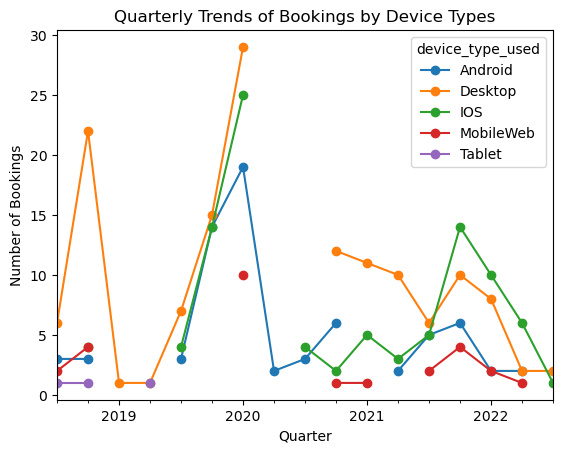

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
bookings_data = pd.read_csv('Bookings.csv')
sessions_data = pd.read_csv('Sessions.csv')

# Find the number of distinct bookings and sessions
distinct_bookings = bookings_data['booking_id'].nunique()
distinct_sessions = sessions_data['session_id'].nunique()
print("Number of distinct bookings:", distinct_bookings)
print("Number of distinct sessions:", distinct_sessions)

# Count sessions with more than one booking
sessions_with_multiple_bookings = sessions_data[sessions_data['session_id'].duplicated(keep=False)]
count_sessions_with_multiple_bookings = sessions_with_multiple_bookings['session_id'].nunique()
print("Number of sessions with more than one booking:", count_sessions_with_multiple_bookings)

# Find days of the week with the highest number of bookings
bookings_data['booking_date'] = pd.to_datetime(bookings_data['booking_date'], format='%d-%m-%Y')
bookings_data['day_of_week'] = bookings_data['booking_date'].dt.day_name()
day_bookings_counts = bookings_data['day_of_week'].value_counts()
print("Days of the week with highest number of bookings:")
print(day_bookings_counts)
print(bookings_data.head())

# Plotting a pie chart for the distribution of bookings by day of the week
plt.figure(figsize=(8, 6))
plt.pie(day_bookings_counts, labels=day_bookings_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Bookings by Day of the Week")
plt.show()

# Most booked route for customers with more than 1 booking
customers_with_multiple_bookings = bookings_data['customer_id'].value_counts()
customers_with_multiple_bookings = customers_with_multiple_bookings[customers_with_multiple_bookings > 1]
most_booked_routes = bookings_data[bookings_data['customer_id'].isin(customers_with_multiple_bookings.index)]
most_booked_route = most_booked_routes.groupby(['from_city', 'to_city']).size().idxmax()
print("Most booked route for customers with more than 1 booking:", most_booked_route)

# Top 3 departure cities with most advance bookings (at least 5 departures)
departure_city_counts = bookings_data['from_city'].value_counts()
advance_departure_cities = departure_city_counts[departure_city_counts >= 5].index
advance_departure_cities_bookings = bookings_data[bookings_data['from_city'].isin(advance_departure_cities)]
top_3_advance_departure_cities = advance_departure_cities_bookings.groupby('from_city').size().nlargest(3)
print("Top 3 departure cities with most advance bookings")
print("top_3_advance_departure_cities")

merged_df = pd.merge(bookings, sessions, on="booking_id", how='left')
grouped_info = merged_df.groupby(['search_date']).agg({'booking_id':'nunique', 'search_id':"nunique", 'customer_id':'nunique'}).reset_index()
grouped_info_columns = ['date', 'num_bookings', 'num_searches', 'num_customers']
grouped_info.head()

# Correlation heatmap of numerical columns in bookings dataset
numerical_columns = ['gross_booking_value']
correlation_matrix = bookings_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

# Trends of quarterly bookings by device types
bookings_data['booking_date'] = pd.to_datetime(bookings_data['booking_date'])
bookings_data['quarter'] = bookings_data['booking_date'].dt.to_period('Q')
device_type_trends = bookings_data.groupby(['quarter', 'device_type_used']).size().unstack()
device_type_trends.plot(kind='line', marker='o')
plt.xlabel("Quarter")
plt.ylabel("Number of Bookings")
plt.title("Quarterly Trends of Bookings by Device Types")
plt.show()